In [1]:
# PDI with openCV Recap
vid1="/home/egomezos/Documents/udea-lessons/pdi2/raw_iandertalbot_videos/video01.mp4"
vid2="/home/egomezos/Documents/udea-lessons/pdi2/raw_iandertalbot_videos/video40.mp4"
test1="/home/egomezos/Documents/udea-lessons/pdi2/samples/test1.png"
test2="/home/egomezos/Documents/udea-lessons/pdi2/samples/test2.png"

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rgbshow(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# reading images and videos
openCV stores images in BGR format (the reverse of RGB)

Images
* to read images use img=cv2.imread(path)
* to show it use cv2.imshow('name', img) on scripts
* to show images on notebooks use plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

Videos

* to stream videos and apply operations to it use cv2.VideoCapture(camId: int)
* to read video files and apply operations use cv2.VideoCapture(path)

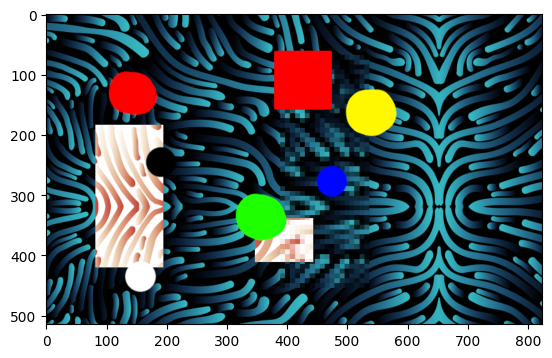

In [3]:
img1=cv2.imread(test1)
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

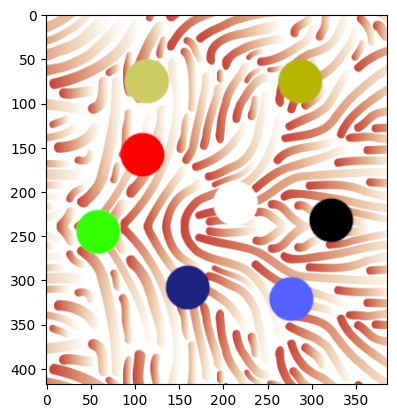

In [4]:
img2=cv2.imread(test2)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

In [5]:
img1.shape #height width channels

(515, 824, 3)

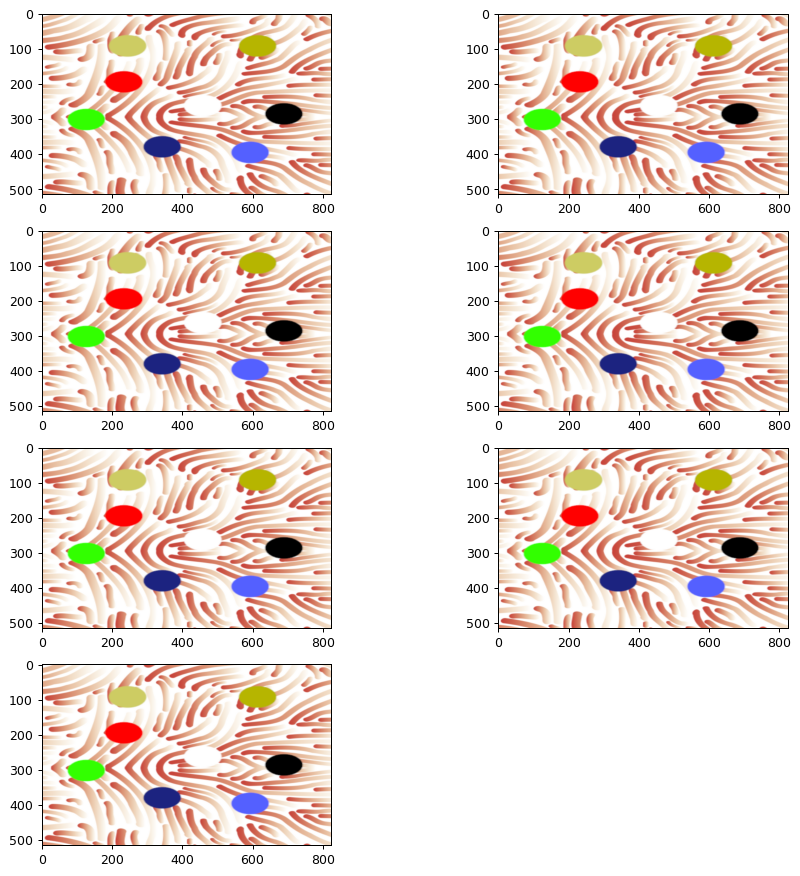

In [6]:
import utils
plt.figure(figsize=(12, 12), dpi=90)
for i in [0,1,2,3,4,5,6]:
    plt.subplot(4,2,i+1)
    x=cv2.resize(img2,img1.shape[1::-1],i)
    plt.imshow(cv2.cvtColor(x,cv2.COLOR_BGR2RGB))
plt.show()

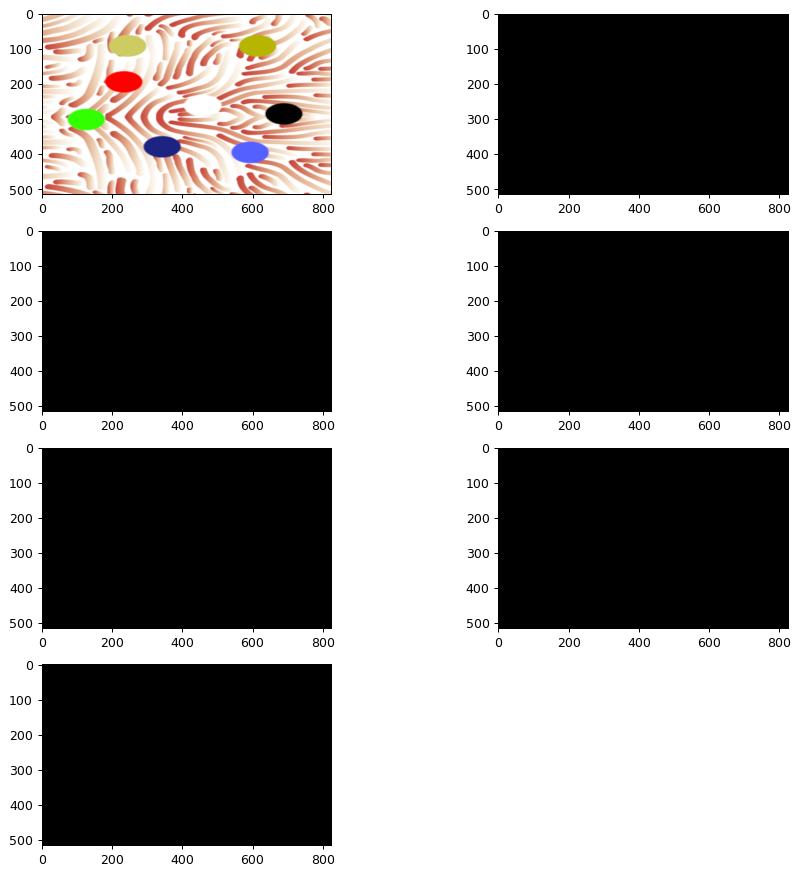

In [7]:
plt.figure(figsize=(12, 12), dpi=90)
for i in [0,1,2,3,4,5,6]:
    plt.subplot(4,2,i+1)
    x=cv2.resize(img2,img1.shape[1::-1],i)
    if i:
        plt.imshow(cv2.cvtColor(x-xbase,cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(cv2.cvtColor(x,cv2.COLOR_BGR2RGB))
        xbase=x
plt.show()

#osea que todos son la misma pendejada. Parece que no es como en Cpp
#nota: en livestreamings se hace resize en el capture.set

# Metiéndole un poquito el acelerador

(500, 500)


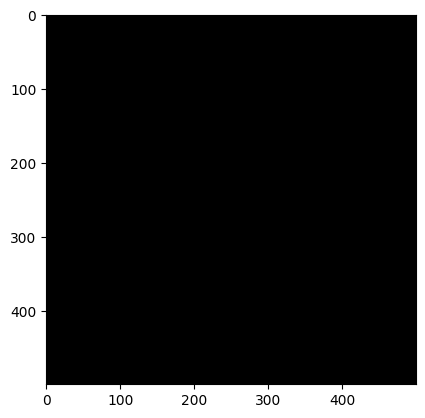

In [8]:
#dark image
dark=np.zeros((500,500),dtype='uint8') # only 2 channels (binary)
/print dark.shape
rgbshow(dark)

(500, 700, 3)
(700, 500)


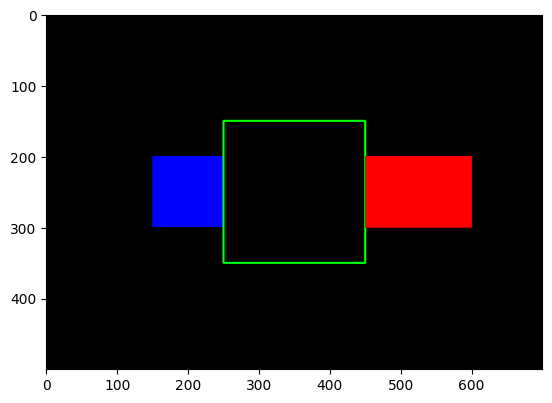

In [9]:
dark=np.zeros((500,700,3),dtype='uint8') # 3 channels (bgr)
/print dark.shape
dark[200:300,150:250]=255,0,0 #blue rectangle

#green rectangle in the center:
/print dark.shape[1::-1]
pc=[j//2 for j in dark.shape[1::-1]]
rect=(100,)*2 #basically makes a 200px square
p1=np.subtract(pc,rect)
p2=np.add(pc,rect)
cv2.rectangle(dark, p1, p2, (0,255,0), thickness=2)

#red rectangle
cv2.rectangle(dark,(p2[0],200), (600,300), (0,0,255), thickness=-1)



rgbshow(dark)

(500, 700, 3)
(700, 500)
[250 350]


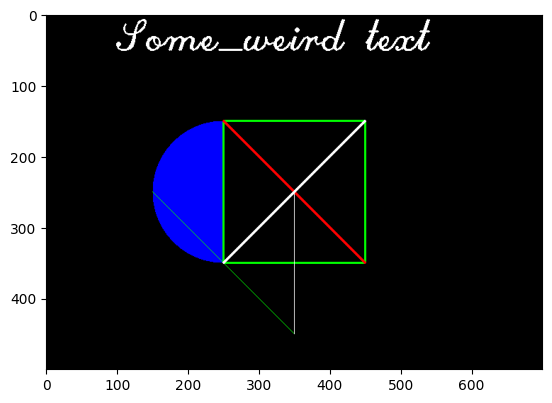

In [10]:
dark=np.zeros((500,700,3),dtype='uint8') # 3 channels (bgr)
/print dark.shape

#blue circle
cv2.circle(dark,(250,250), 100, (255,0,0), thickness=-1)

#green rectangle in the center:
/print dark.shape[1::-1]
pc=[j//2 for j in dark.shape[1::-1]]
rect=(100,)*2 #basically makes a 200px square
p1=np.subtract(pc,rect)
p2=np.add(pc,rect)
cv2.rectangle(dark, p1, p2, (0,255,0), thickness=2)
cv2.rectangle(dark, np.add(p1,(2,2)), np.subtract(p2,(2,2)), (0,0,0), thickness=-1)

#lines (cross)
cv2.line(dark,p1,p2,(0,0,255),thickness=2)
cv2.line(dark,p1[::-1],p2[::-1],(0,255,0))
(w,h)=dark.shape[1::-1]
cv2.line(dark,np.subtract((w,2*p1[1]),p1),np.subtract((w,2*p2[1]),p2),(255,255,255),thickness=2)

p11=np.subtract((w,2*p1[1]),p1)
p22=np.subtract((w,2*p2[1]),p2)

cv2.line(dark,p2[::-1],pc,(255,255,255))

/print p22

#text
cv2.putText(dark,'Some_weird text',(100,50),cv2.FONT_HERSHEY_SCRIPT_COMPLEX,2.0,(255,255,255),2)


rgbshow(dark)

# Properties of videos (VideoCapture Properties)

In order to find details of the current video being played, some properties might help:
https://docs.opencv.org/3.4/d4/d15/group__videoio__flags__base.html#gaeb8dd9c89c10a5c63c139bf7c4f5704d

Some video flags:
https://docs.opencv.org/3.4/d4/d15/group__videoio__flags__base.html

In [11]:
cap1=cv2.VideoCapture(vid1)
/print cap1.get(cv2.CAP_PROP_FPS)
/print cap1.get(cv2.CAP_PROP_FRAME_COUNT)

#CURRENT FRAME POSITION 0-BASED
/print cap1.get(cv2.CAP_PROP_POS_FRAMES)
#CURRENT FRAME POSITION TIME-BASED
/print cap1.get(cv2.CAP_PROP_POS_MSEC)

/print cap1.get(cv2.CAP_PROP_FRAME_WIDTH)
/print cap1.get(cv2.CAP_PROP_FRAME_HEIGHT)
#remember to release the capture pointer
cap1.release()

15.0
161.0
0.0
0.0
640.0
480.0


# Useful actions in opencv

### grayscaling

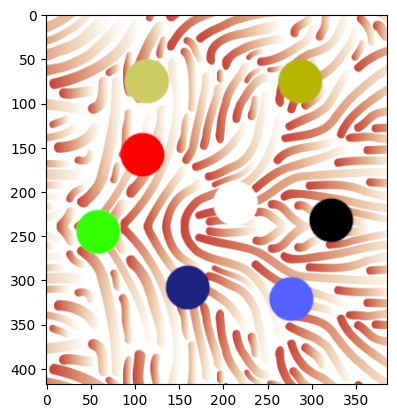

In [12]:
img2=cv2.imread(test2)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

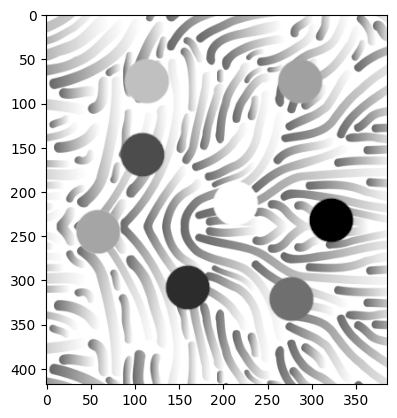

In [13]:
img2gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
rgbshow(img2gray)

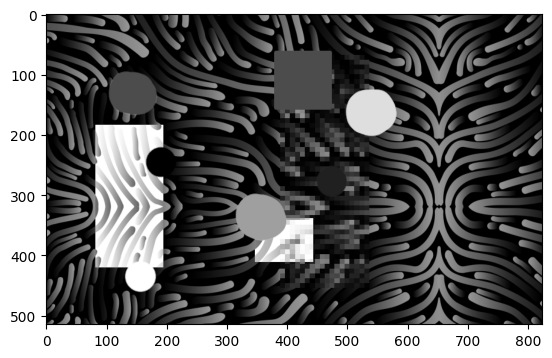

In [14]:
img1=cv2.imread(test1)
img1gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
rgbshow(img1gray)

### Blur
In order to reduce noise you can blur an image.
with Gaussian Blur:
inputs the image, kernel size (odd number), and a border type

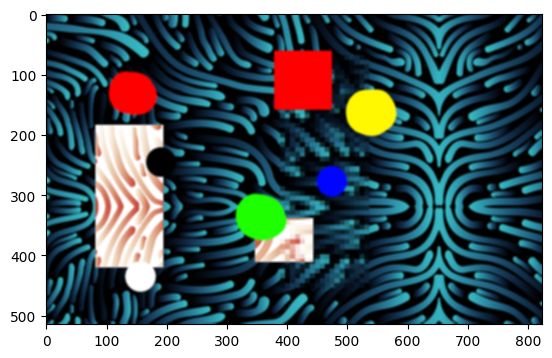

In [15]:
img1blur=cv2.GaussianBlur(img1,(5,5), cv2.BORDER_DEFAULT)
rgbshow(img1blur)

In [16]:
#image comparer
def compare(i1,i2,vert=False):
    h=1 if not vert else 2
    v=2 if not vert else 1
    if not vert:
        plt.figure(figsize=(40,20), dpi=50)
    else:
        plt.figure(figsize=(16,8))
    
    plt.subplot(h,v,1)
    if vert:
        plt.xticks([])
    rgbshow(i1)
    
    plt.subplot(h,v,2)
    if not vert:
        plt.yticks([])
    rgbshow(i2)
    
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

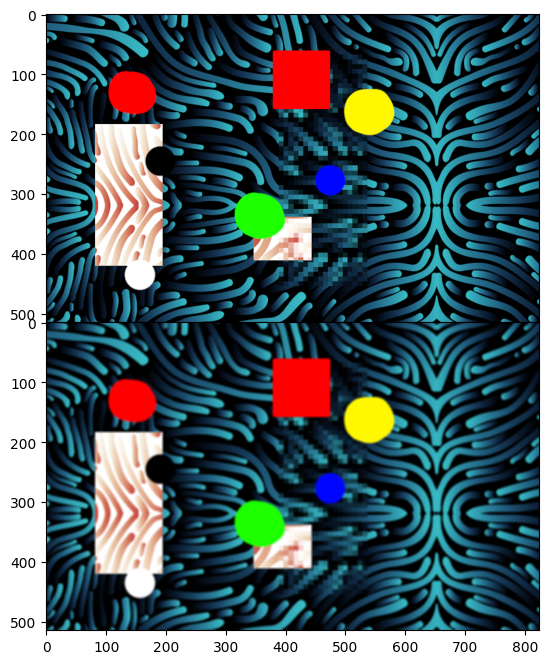

In [17]:
compare(img1,img1blur,1)

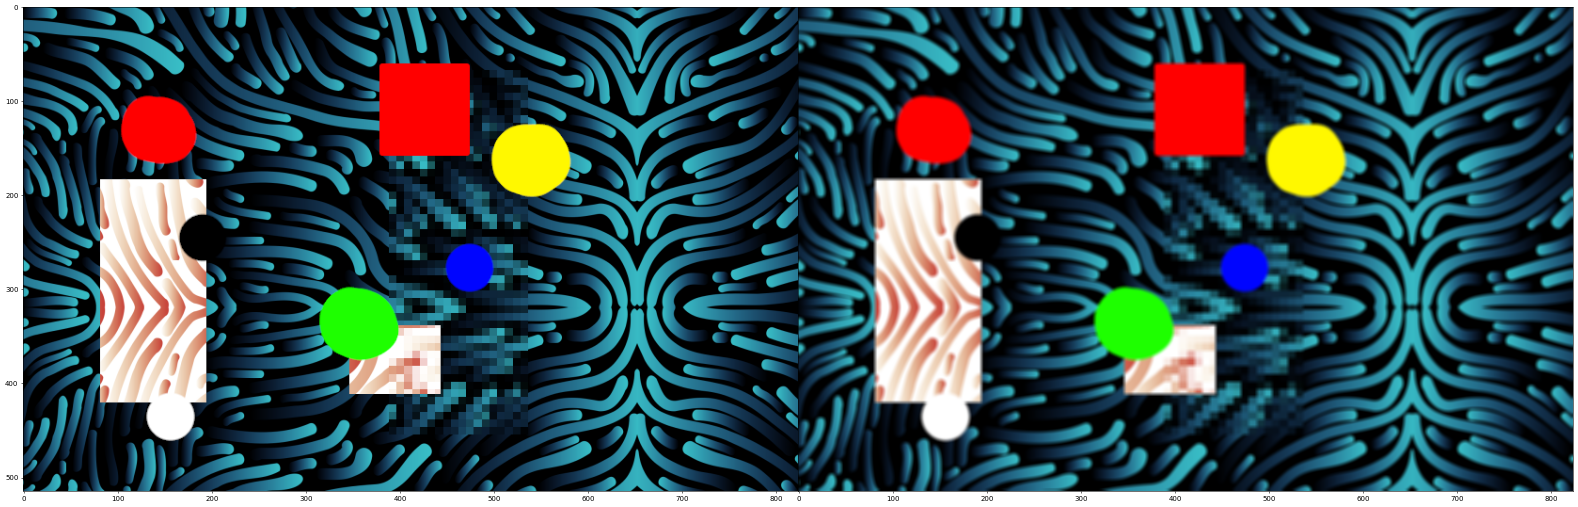

In [18]:
compare(img1,img1blur)

## Edge detection
Canny very famous

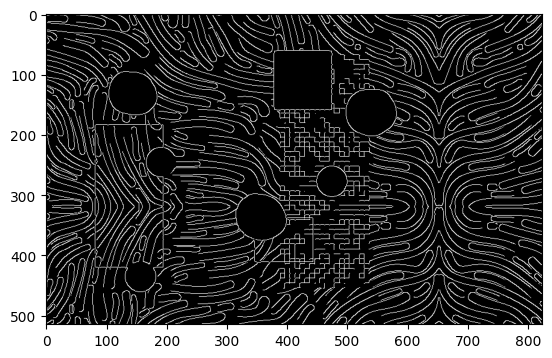

In [19]:
img1edges=cv2.Canny(img1,125,175)
rgbshow(img1edges)

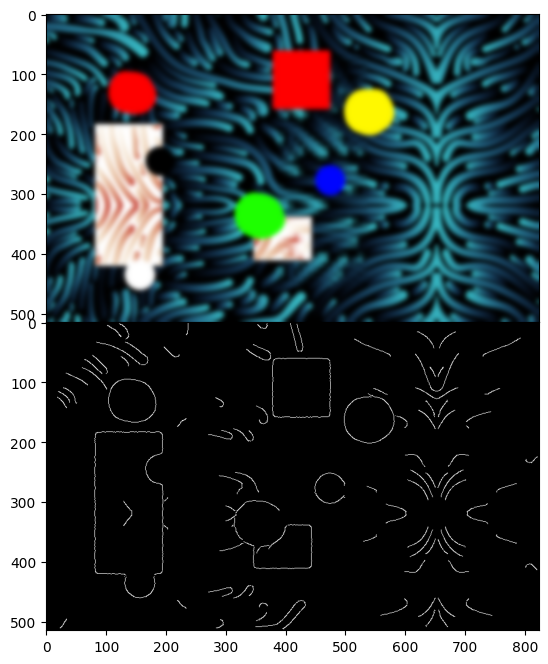

In [20]:
img1blur2=cv2.GaussianBlur(img1,(37,37), cv2.BORDER_DEFAULT)
#rgbshow(img1blur2)
img1edges2=cv2.Canny(img1blur2,125,175)
compare(img1blur2,img1edges2,1)

In [21]:
#interactive blur?
%matplotlib widget

from ipywidgets import interact


def update(t1=125,t2=175):
    img1edges3=cv2.Canny(img1blur2,t1,t2)
    rgbshow(img1edges3)
    plt.show()

#treshold update
interact(update, t1 = (1,200,1), t2 = (1,200,1));


interactive(children=(IntSlider(value=125, description='t1', max=200, min=1), IntSlider(value=175, description…

In [22]:
add histograms and interactive stuff

SyntaxError: invalid syntax (2609794880.py, line 1)